<a href="https://colab.research.google.com/github/taketaka-MU/hs-2023/blob/main/20230810/ohtani2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pybaseball
from pybaseball import statcast
df = statcast(start_dt='2023-03-31', end_dt='2023-12-31')

This is a large query, it may take a moment to complete


/usr/local/lib/python3.10/dist-packages/pybaseball/statcast.py:50: UserWarning: 
That's a nice request you got there. It'd be a shame if something were to happen to it.
We strongly recommend that you enable caching before running this. It's as simple as `pybaseball.cache.enable()`.
Since the Statcast requests can take a *really* long time to run, if something were to happen, like: a disconnect;
gremlins; computer repair by associates of Rudy Giuliani; electromagnetic interference from metal trash cans; etc.;
you could lose a lot of progress. Enabling caching will allow you to immediately recover all the successful
subqueries if that happens.
  warnings.warn(_OVERSIZE_WARNING)


Skipping offseason dates


100%|██████████| 230/230 [03:40<00:00,  1.05it/s]


In [ ]:
df_ohtani = df[df['batter'] == 660271] # Shohei Ohtani
ohtani_home_run_data = df_ohtani[df_ohtani['events'] == 'home_run'] # ホームラン
print(ohtani_home_run_data.shape)

(39, 92)


In [ ]:
ohtani_home_run_data = ohtani_home_run_data.dropna(subset=['launch_angle', 'launch_speed'])      # 抜けのあるデータを削除
ohtani_home_run_data['hit_distance_m'] = ohtani_home_run_data['hit_distance_sc'] * 0.3048        # 飛距離の単位を m
ohtani_home_run_data['launch_speed_ms'] = ohtani_home_run_data['launch_speed'] * 1609.34 / 3600  # 打球初速の単位を m/s
#ohtani_home_run_data['launch_angle_rad'] = np.radians(ohtani_home_run_data['launch_angle'])  # 打球角度の単位を radian (弧度法)

In [ ]:
last_home_run=ohtani_home_run_data.iloc[0] # 一番最近のホームラン
print(last_home_run)

pitch_type                             FF
game_date             2023-07-28 00:00:00
release_speed                        93.4
release_pos_x                       -2.48
release_pos_z                         5.8
                             ...         
spin_axis                             218
delta_home_win_exp                 -0.103
delta_run_exp                         1.0
hit_distance_m                   121.0056
launch_speed_ms                 46.268525
Name: 4099, Length: 94, dtype: object


In [ ]:
angle=last_home_run['launch_angle']
speed = last_home_run['launch_speed_ms']
print('angle=%f, speed=%f' % (angle, speed))

angle=28.000000, speed=46.268525


In [ ]:
print(speed*60*60/1000) # 時速

166.56669000000002


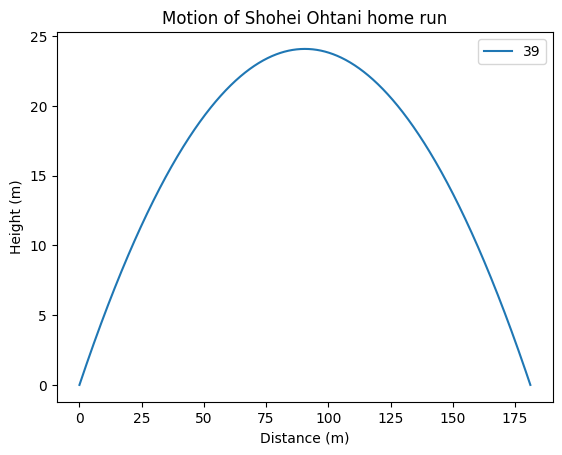

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
angle = np.radians(28.0) # 角度 (radian)
speed = 46.3 # 初速 (m/s)
g = 9.81  # 重力加速度 m/s^2
t_flight = 2 * speed * np.sin(angle) / g # 滞空時間
t = np.linspace(0, t_flight, num=1000)
x = speed * np.cos(angle) * t
y = speed * np.sin(angle) * t - 0.5 * g * t ** 2
plt.plot(x, y,label="39")

plt.xlabel('Distance (m)')
plt.ylabel('Height (m)')
plt.title('Motion of Shohei Ohtani home run')
plt.legend()
plt.show()

(39, 94)
121.0056


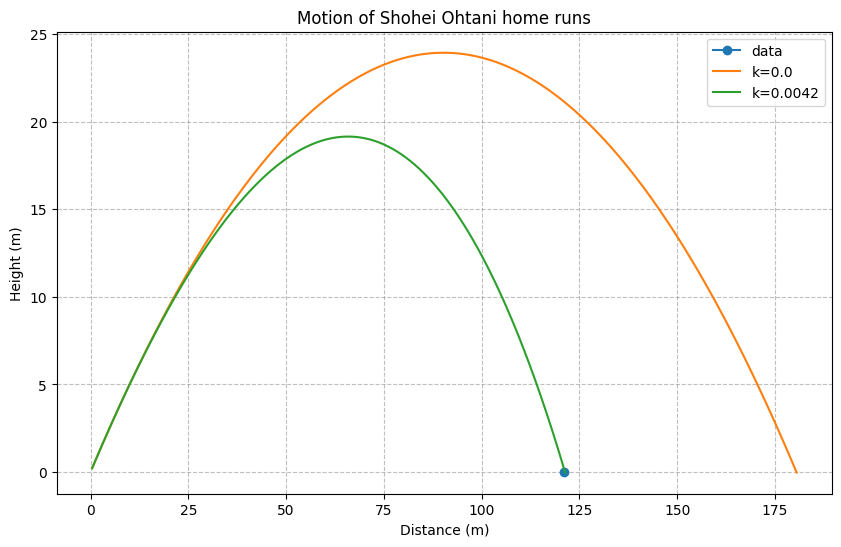

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

def calc(launch_speed, launch_angle, k): # with air resistance
    launch_angle = math.radians(launch_angle)  # Convert degrees to radians
    g = 9.81  # Gravity acceleration in m/s^2
    t_flight = 2 * launch_speed * np.sin(launch_angle) / g
    t = np.linspace(0, t_flight, num=1000)
    ux = launch_speed * math.cos(launch_angle)
    uy = launch_speed * math.sin(launch_angle)
    x, y = 0, 0
    dt=0.01
    gux,guy,gx,gy = [], [], [], []
    for i in range(1000):
      uxold,uyold,xold,yold=ux,uy,x,y
      u=math.sqrt(ux*ux+uy*uy)
      ux += (- k * u * ux)*dt
      uy += (-g -k * u * uy)*dt
      x += ux * dt
      y += uy * dt
      gux.append(ux)
      guy.append(uy)
      gx.append(x)
      gy.append(y)
      if(y < 0):
        break;

    return gux,guy,gx,gy

plt.figure(figsize=(10, 6))
print(ohtani_home_run_data.shape)
row=ohtani_home_run_data.iloc[0] # 最新のホームラン
hit_distance = row['hit_distance_m']
launch_speed = row['launch_speed_ms']
launch_angle = row['launch_angle']
print(hit_distance)
k=0.0042
ux0, uy0, x0, y0 = calc(launch_speed, launch_angle, 0.0)
ux, uy, x, y = calc(launch_speed, launch_angle, k)
plt.plot(hit_distance, 0,marker='o', label="data")
plt.plot(x0, y0,label="k={}".format(0.0))
plt.plot(x, y,label="k={}".format(k))

plt.xlabel('Distance (m)')
plt.ylabel('Height (m)')
plt.title('Motion of Shohei Ohtani home runs')
plt.grid(which='both', linestyle='--', color='gray', alpha=0.5)
plt.legend()
plt.show()